# Kings County House Prices 2014-2015

**overview of the data**

contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

id : A notation for a house

date: Date house was sold

price: Price is prediction target

bedrooms: Number of bedrooms

bathrooms: Number of bathrooms

sqft_living: Square footage of the home

sqft_lot: Square footage of the lot

floors :Total floors (levels) in house

waterfront :House which has a view to a waterfront

view: Has been viewed

condition :How good the condition is overall

grade: overall grade given to the housing unit, based on King County grading system

sqft_above : Square footage of house apart from basement

sqft_basement: Square footage of the basement

yr_built : Built Year

yr_renovated : Year when house was renovated

zipcode: Zip code

lat: Latitude coordinate

long: Longitude coordinate

sqft_living15 : Living room area in 2015(implies-- some renovations) 
This might or might not have affected the lotsize area

sqft_lot15 : LotSize area in 2015(implies-- some renovations)


In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')



# DATA CLEANSING AND ANALYSIS

Let's first read in the house data as a dataframe "df" and inspect the first 5 rows

In [2]:
df = pd.read_csv("C:/Users/admin/Desktop/kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

**Now its time for some general data inspection. Let's first examine to see if there are any nulls in the dataframe as well as look at the type of the data (i.e whether it is a string or numeric)**



In [5]:
#Check for missing Values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**The data is pretty clean. There are no pesky nulls which we need to treat and most of the features are in numeric format. Let's go ahead and drop the "id" and "date" columns as these 2 features will not be used in this analysis.**

# Descriptive Statistics and then transpose

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [8]:
#Sort Data by price
df.sort_values("price")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15279,40000362,5/6/2014,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449


In [9]:
df.sort_values("price", ascending = False).head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [10]:
#Inspect each Column
for val in df:
   print(df[val].value_counts())
   print()

795000620     3
1568100300    2
2892700041    2
1450100390    2
3395040550    2
             ..
2595650170    1
7212651100    1
9808700025    1
6772200055    1
2424410110    1
Name: id, Length: 21420, dtype: int64

6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
            ... 
8/3/2014       1
11/2/2014      1
5/17/2014      1
5/27/2015      1
1/10/2015      1
Name: date, Length: 372, dtype: int64

350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
285750.0      1
162950.0      1
612995.0      1
255544.0      1
897000.0      1
Name: price, Length: 3622, dtype: int64

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      7

**Pairplot Visualisation**

Let's create some Seaborn pairplots for the features ('sqft_lot','sqft_above','price','sqft_living','bedrooms') to get a feel for how the various features are distributed vis-a-vis the price as well as the number of bedrooms

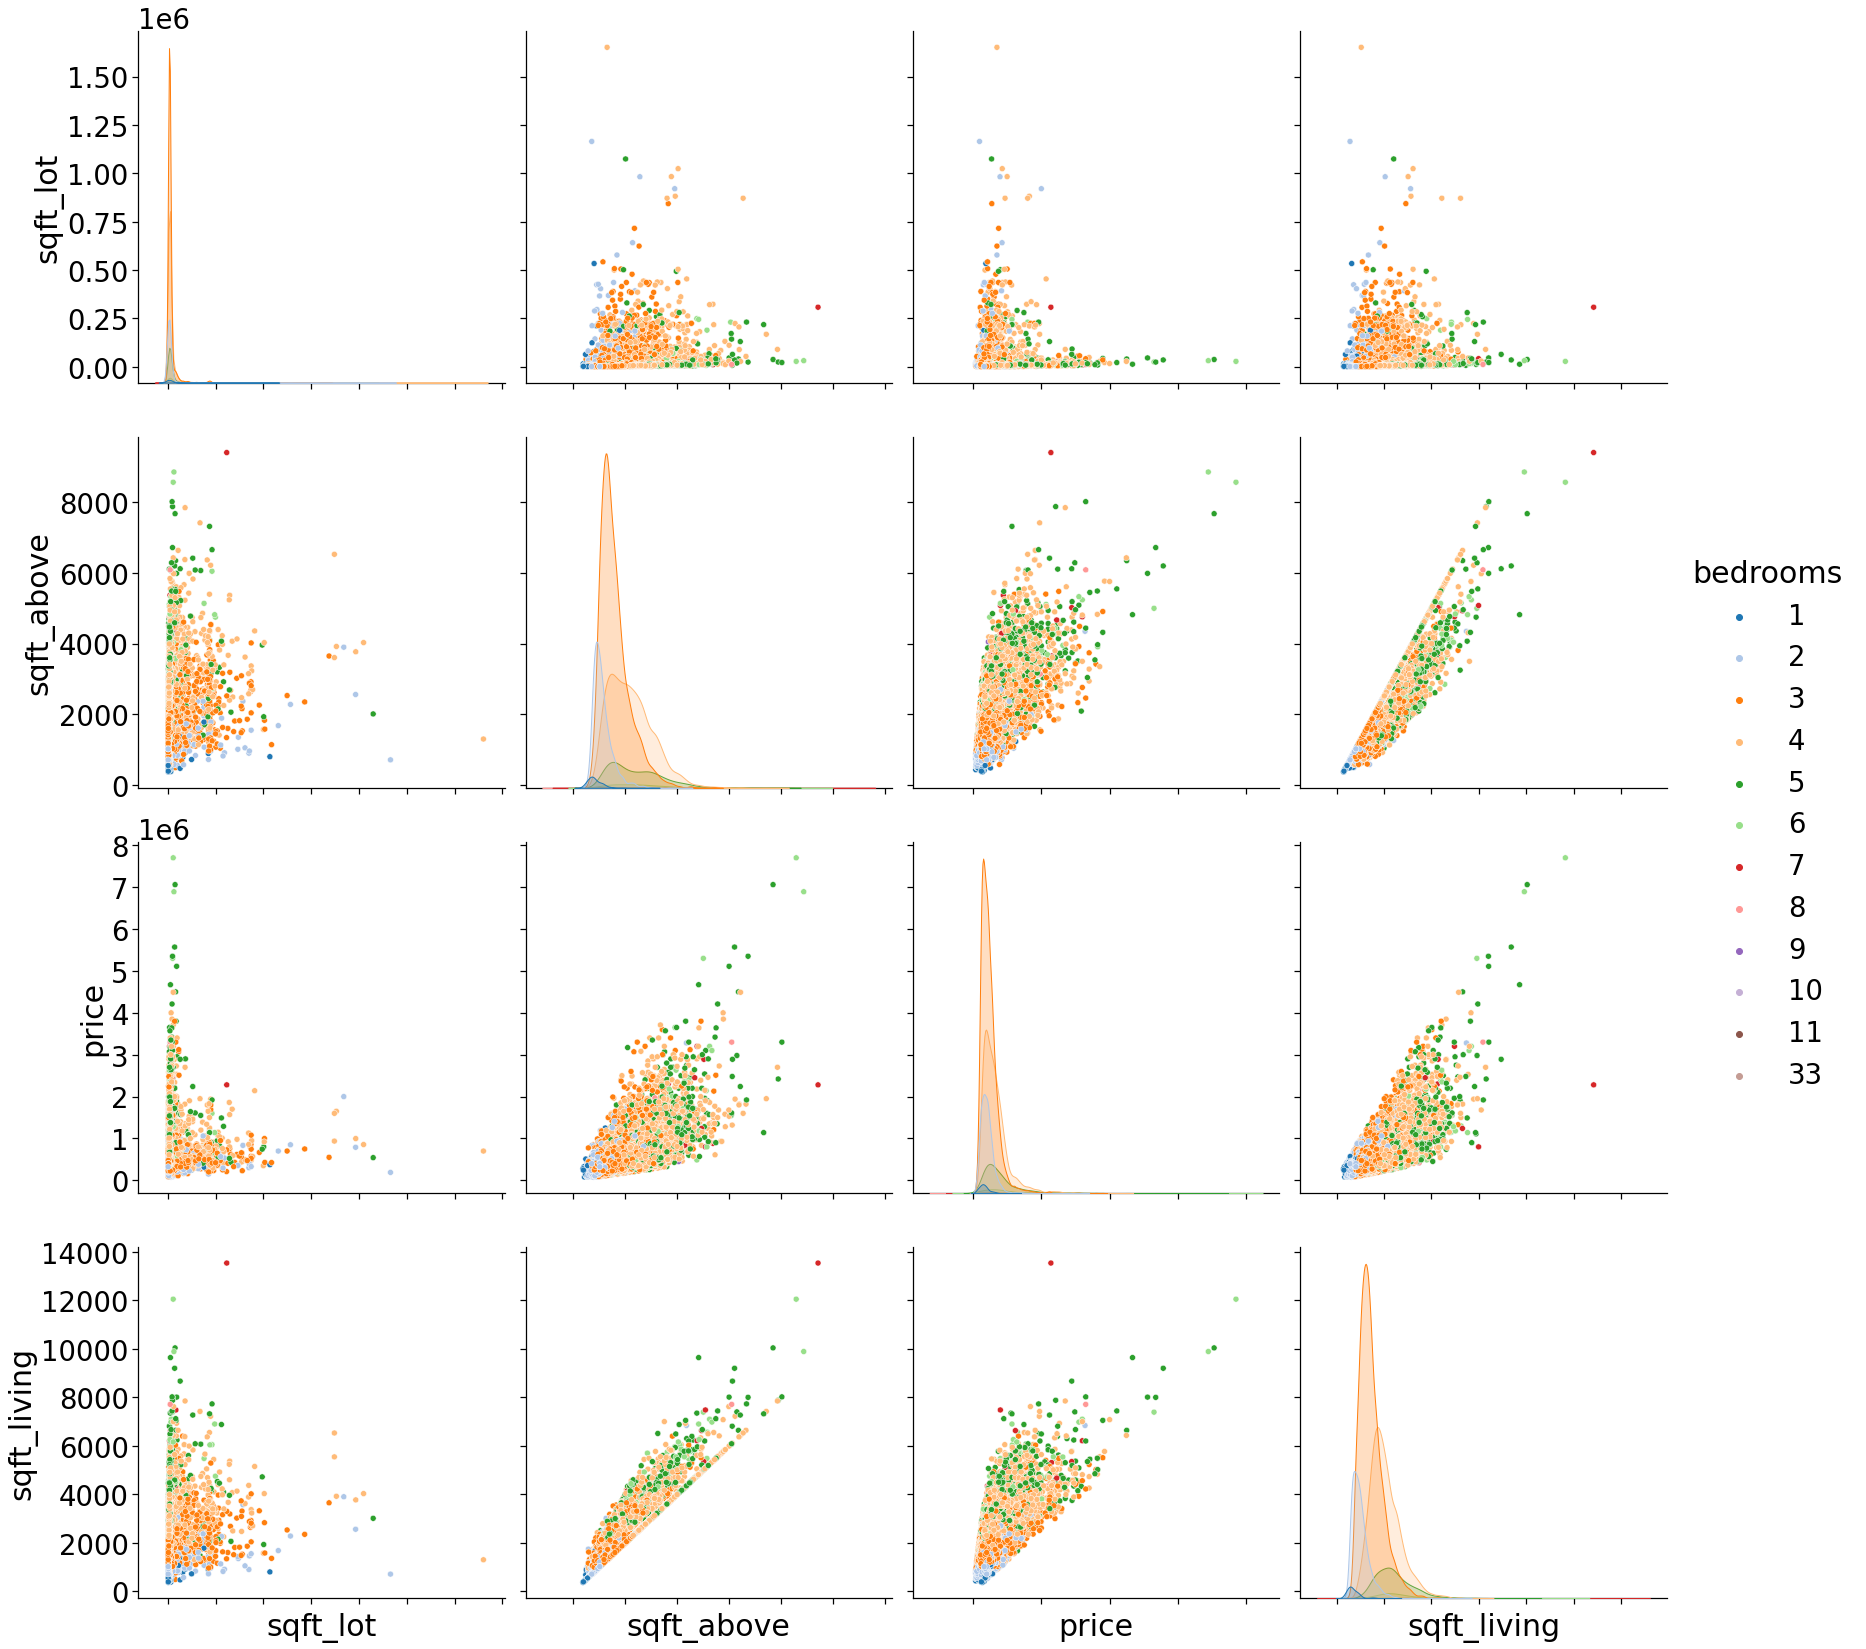

In [11]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(df[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], 
                 hue='bedrooms', palette='tab20',size=6)
g.set(xticklabels=[]);

From the pairplots, we seem to get the classical linear distribution of the data points.

### House Price Distribution

<AxesSubplot:xlabel='price', ylabel='Density'>

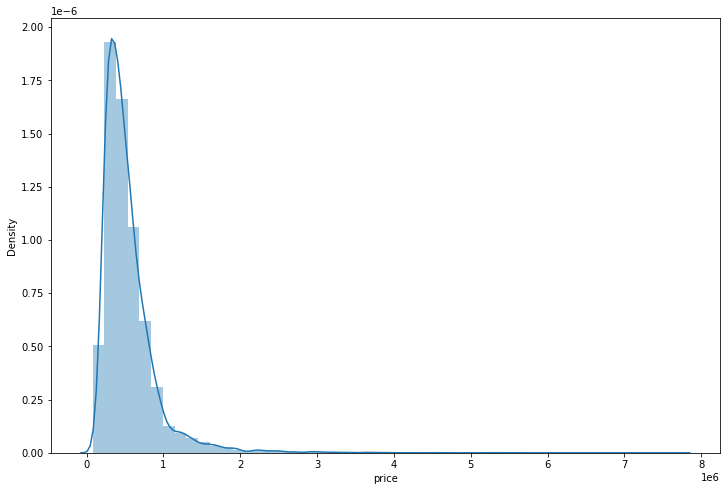

In [12]:

plt.figure(figsize = (12,8))
sns.distplot(df['price'])

### Living Space Distribution

<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

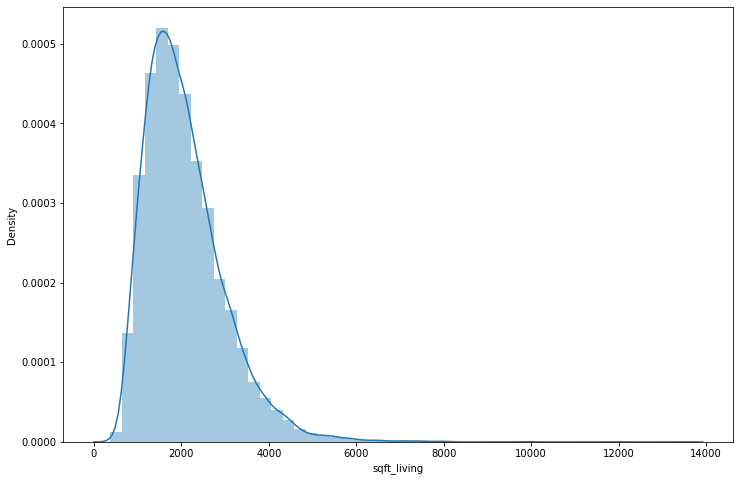

In [13]:
plt.figure(figsize = (12,8))
sns.distplot(df['sqft_living'])

### Bedrooms and Bathrooms

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

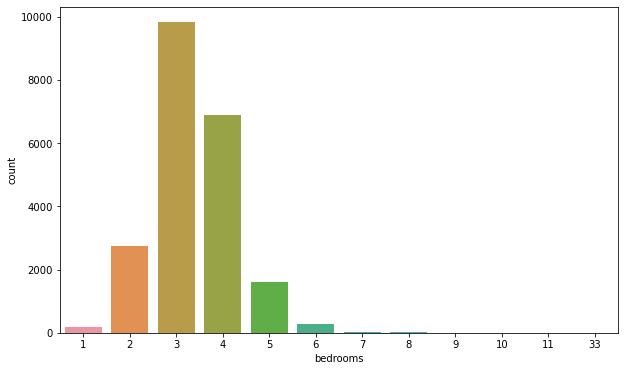

In [14]:
plt.figure(figsize = (10,6))
sns.countplot(df['bedrooms'])

<AxesSubplot:xlabel='bathrooms', ylabel='Density'>

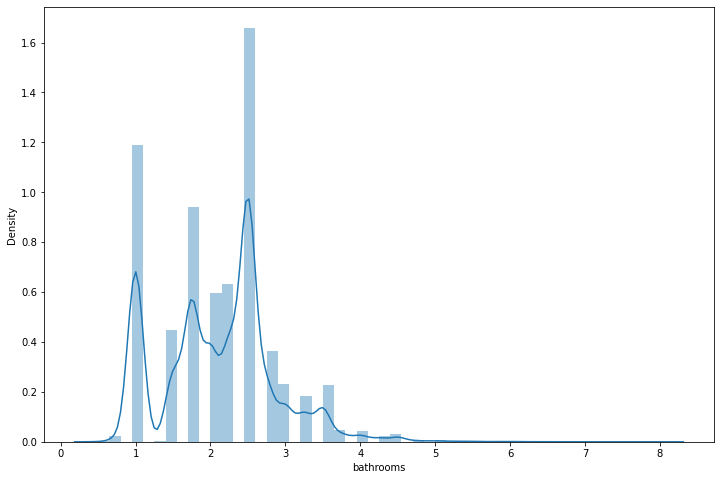

In [15]:
plt.figure(figsize = (12,8))
sns.distplot(df['bathrooms'])

### Grade

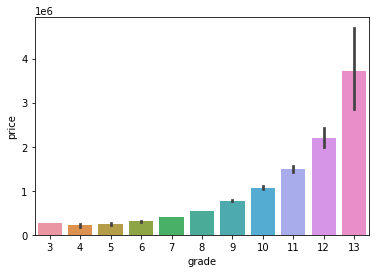

In [16]:
fig = sns.barplot(x='grade', y='price', data=df)


### Year Built

<AxesSubplot:>

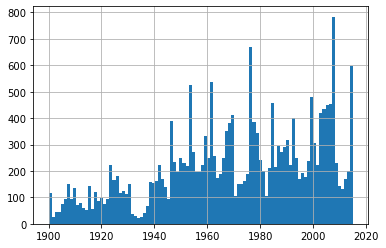

In [17]:
df['yr_built'].hist(bins = 100)

### Floors

<AxesSubplot:xlabel='floors', ylabel='count'>

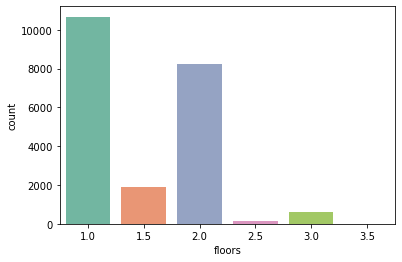

In [18]:
sns.countplot(x='floors',data=df, palette='Set2')

### Scatter Graph of Price vs Living Space

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

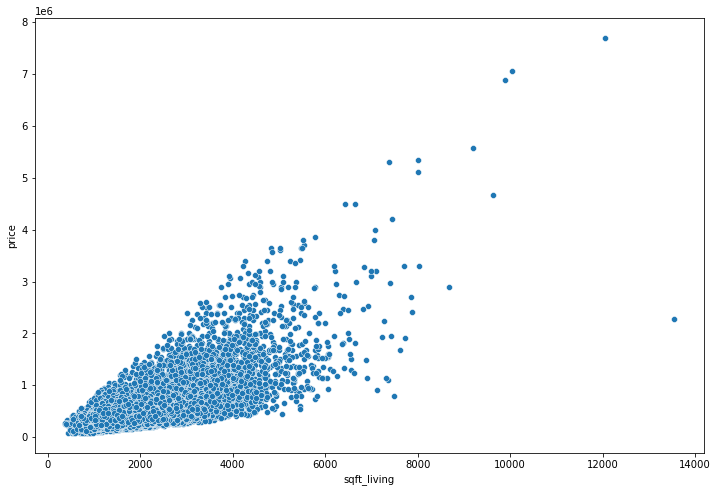

In [19]:
plt.figure(figsize = (12,8))
sns.scatterplot(x='sqft_living',y='price',data=df)

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

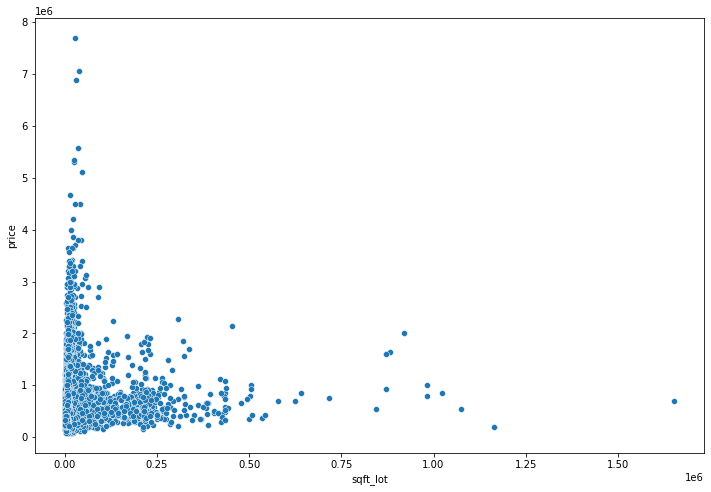

In [20]:
plt.figure(figsize = (12,8))
sns.scatterplot(x='sqft_lot',y='price',data=df)

### Waterfront properties come at a premium

<AxesSubplot:xlabel='waterfront', ylabel='price'>

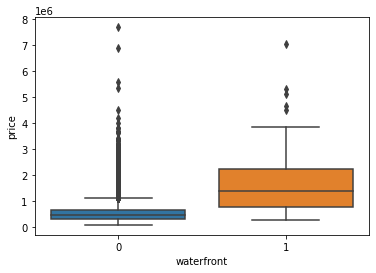

In [21]:
sns.boxplot(x='waterfront',y='price',data=df)

### Longiutde And Latitude

<AxesSubplot:xlabel='long', ylabel='lat'>

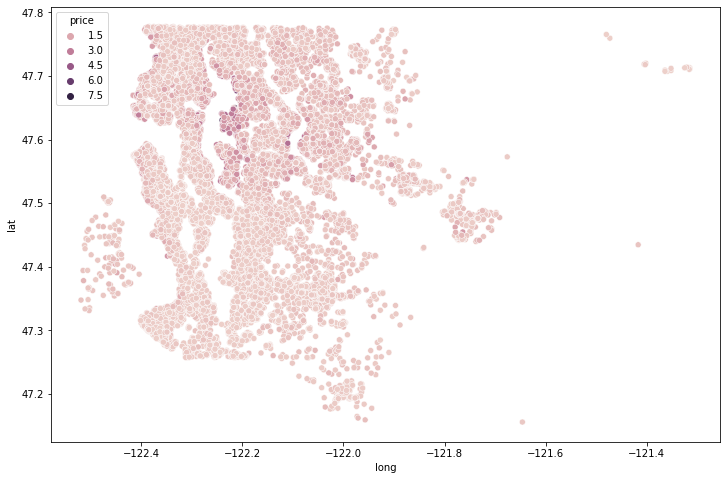

In [22]:
plt.figure(figsize = (12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

## The Correlation Matrix

In [23]:
# Finding out the correlation between the features
corr = df.corr()
corr.shape

(20, 20)

<AxesSubplot:>

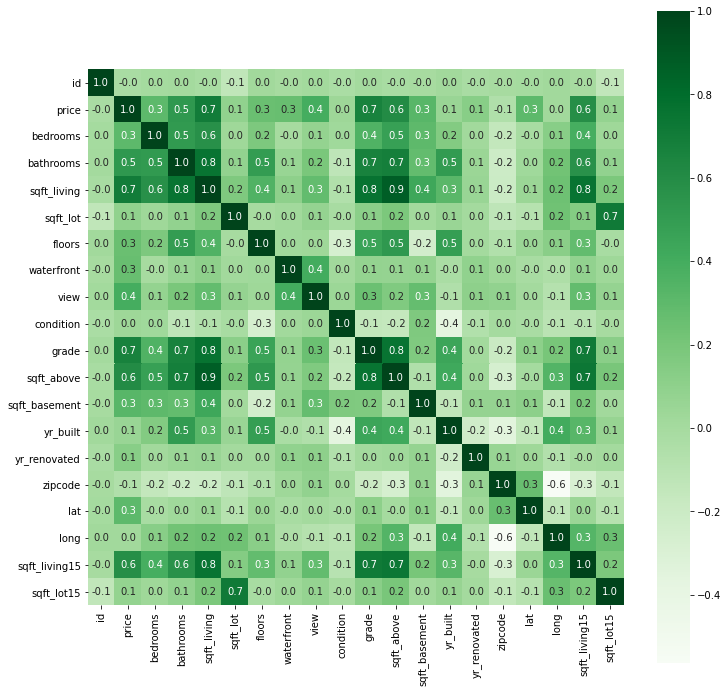

In [24]:
# Plotting the heatmap of correlation between features

plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Greens')

### Drop some strings



In [25]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [26]:
dCol = ['id', 'date', 'zipcode']
df.drop(dCol, axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


## Full Sample target variable and independent variables

In [27]:
X = df.drop(['price'], axis = 1)
y = df['price']

## Splitting to training and testing data

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.40, random_state = 101)

### Linear Regression: Import library

In [29]:
# Import library for Linear Regression
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [30]:
# Create a Linear regressor
lm = LinearRegression()


In [31]:
# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [32]:
#Coefficients if LR

coeff_def = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

In [33]:
coeff_def

,Coefficient
bedrooms,-34683.695951
bathrooms,44876.510300
sqft_living,103.405479
sqft_lot,0.159161
floors,-817.653208
waterfront,657191.353145
view,46365.954610
condition,27984.302393
grade,99267.207808
sqft_above,70.061126


**Linear Regression: Model prediction on train data**

In [34]:
# Model prediction on train data
y_pred = lm.predict(X_train)

### Linear Regression: Model Evaluation

In [35]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.6985011255141467
Adjusted R^2: 0.6981050296203091
MAE: 126478.9392275985
MSE: 40723776411.03191
RMSE: 201801.32906160929


In [56]:
#apply standard scaling. and import cross validation function
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
#import linear regretion models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV

In [60]:
#applying Linear Regression
model = LinearRegression()

scores = cross_val_score(model, X_train, y_train, cv=20)

print("Mean cross-validated training score:", scores.mean())

# fit and evaluate the data on the whole training set
model.fit( X_train, y_train)
print("Training Score:", model.score( X_train, y_train))
print("Test Score:", model.score( X_test, y_test))
L_R_S=model.score( X_test, y_test)

Mean cross-validated training score: 0.6930118620984779
Training Score: 0.6985011255141467
Test Score: 0.6907087406676204


In [62]:
#applying Ridge
model = Ridge()

scores = cross_val_score(model, X_train, y_train, cv=20)

print("Mean cross-validated training score:", scores.mean())

# fit and evaluate the data on the whole training set
model.fit( X_train, y_train)
print("Training Score:", model.score( X_train, y_train))
print("Test Score:", model.score( X_test, y_test))
Ridge_S=model.score( X_test, y_test)

Mean cross-validated training score: 0.6930898644933764
Training Score: 0.6985011230431869
Test Score: 0.6907092319175407


In [61]:
#applying lasso as the model
model = Lasso()

scores = cross_val_score(model, X_train, y_train, cv=20)

print("Mean cross-validated training score:", scores.mean())

# fit and evaluate the data on the whole training set
model.fit( X_train, y_train)
print("Training Score:", model.score( X_train, y_train))
print("Test Score:", model.score( X_test, y_test))
Lasso_S=model.score( X_test, y_test)

Mean cross-validated training score: 0.6930884541344463
Training Score: 0.6985011251714409
Test Score: 0.6907094147777866


### Linear Regression: Visualizing the differences between actual prices and predicted values

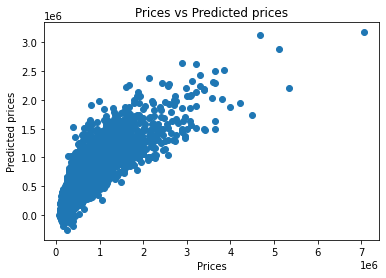

In [36]:
# Visualizing the differences between actual prices and predicted values

plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

### Linear Regression: Inspecting residuals

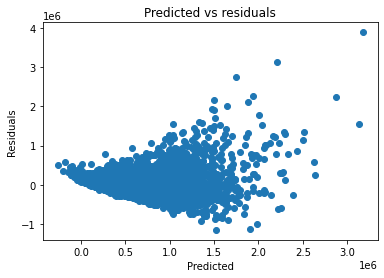

In [37]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

### Linear Regression: Checking Normality of errors

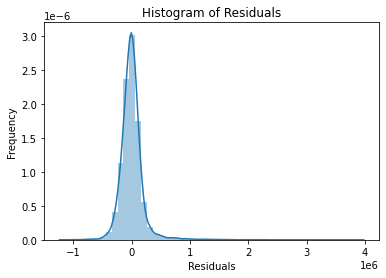

In [38]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

## Linear Regression: Model evaluation

In [39]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [40]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.6907087406676236
Adjusted R^2: 0.6900988402606347
MAE: 125496.27185342816
MSE: 41681828804.154564
RMSE: 204161.28135411613


# Random Forest: Import Random Forest Regressor

In [41]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor()

# Random Forest: Model Evaluation

In [42]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [43]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9830156252119033
Adjusted R^2: 0.9829933118910843
MAE: 26344.405703656135
MSE: 2294097722.690069
RMSE: 47896.7402094346


## Random Forest: Visualizing the differences between actual prices and predicted values

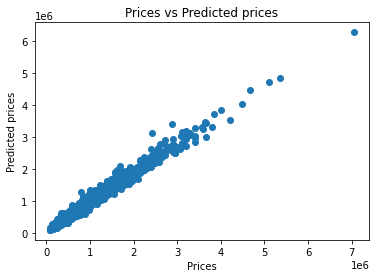

In [44]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

## Random Forest: Checking residuals

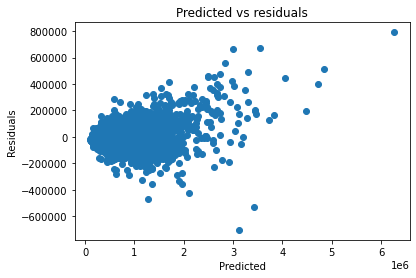

In [45]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

## Random Forest: Predicting Test data with the model

In [46]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

## Random Forest: Model Evaluation

In [47]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8776738014688407
Adjusted R^2: 0.8774325828892061
MAE: 69257.7597711265
MSE: 16485366176.997135
RMSE: 128395.35107236996


## XGBoost

# XGBoost: Import XGBoost Regressor



In [48]:
!pip install xgboost

In [49]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# XGBoost: Model Evaluation

In [50]:
# Model prediction on train data
y_pred = reg.predict(X_train)

# XGBoost: Model Evaluation

In [51]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9781667825790841
Adjusted R^2: 0.9781380990631524
MAE: 39021.99699751119
MSE: 2949036098.7219706
RMSE: 54305.02830053558


## XGBost: Visualizing the differences between actual prices and predicted values

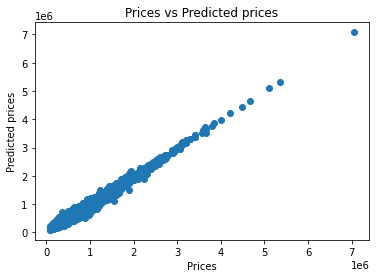

In [52]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

### XGBoost: Predicting Test data with the model

In [53]:
#Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [54]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8795957262590643
Adjusted R^2: 0.8793582975786797
MAE: 69639.75792825414
MSE: 16226356788.068762
RMSE: 127382.71777626964


# Models Compared

In [55]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
2,XGBoost,87.959573
1,Random Forest,87.767380
0,Linear Regression,69.070874


# THANKING YOU 


# FROM:- DEEPAK VISHWAKARMA